<a href="https://colab.research.google.com/github/purvilmehta06/Deep-Learning/blob/master/Lab%208/LabAssignment8_201701073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8: Deep Learning


*   Lab Manual: [Manual Lab 8](https://github.com/purvilmehta06/Deep-Learning/blob/master/Lab%208/Lab_Assignment_8.pdf)
*   Author: Purvil Mehta
*   Id : 201701073
*   Github Link : [Deep Learning Course Lab Work Repo](https://github.com/purvilmehta06/Deep-Learning)


# Library Declaration 


In [6]:
from tensorflow.keras.layers import Dense, Activation
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout,Input, Dense, Layer, InputSpec, UpSampling2D, Reshape, BatchNormalization, Conv2D, MaxPooling2D, Flatten
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import regularizers
from tensorflow.keras import initializers
from keras import regularizers, activations, initializers,constraints, Sequential
from keras.constraints import UnitNorm, Constraint
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
batchSize = 32
validationSplit = 0.2
epochs = 25
dropout = 0.5
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Loading - Normalising Data

In [3]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0

170500096/170498071 [==============================] - 4s 0us/step


# Supportive Functions 

In [4]:
def plot_figures(data,legend,title):
  for i in range(len(data)):
    plt.plot(data[i])
  plt.legend(legend)
  plt.title(title)
  plt.grid()

# Model 1

In [5]:
classTobeCheck = 0;
model1trainY = np.zeros(trainY.shape)
for i in range(len(trainY)):
  if(trainY[i,0] == classTobeCheck):
    model1trainY[i,0] = 1
model1testY = np.zeros((len(testY),1))
for i in range(len(testY)):
  if(testY[i,0] == classTobeCheck):
    model1testY[i,0] = 1
model1testY = to_categorical(model1testY)
model1trainY = to_categorical(model1trainY) 

In [8]:
def buildModel1(kernalSize,trainable=True):
  model = Sequential()
  model.add(Conv2D(32,(kernalSize,kernalSize),activation='relu',input_shape=(32,32,3),trainable=trainable))
  model.add(MaxPooling2D((2, 2)))  
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile('RMSProp',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [9]:
model_history1 = []
model1_1 = buildModel1(1)
model1_1.summary()
history = model1_1.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0,callbacks = callback)
print('Model with kernel size 1 is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][-1],history.history['accuracy'][-1]))
model_history1.append(history)

model1_3 = buildModel1(3)
model1_3.summary()
history = model1_3.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0,callbacks = callback)
print('Model with kernel size 3 is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][-1],history.history['accuracy'][-1]))
model_history1.append(history)

model1_5 = buildModel1(5)
model1_5.summary()
history = model1_5.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0,callbacks = callback)
print('Model with kernel size 5 is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][-1],history.history['accuracy'][-1]))
model_history1.append(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 4,195,970
Trainable params: 4,195,970
Non-trainable params: 0
_________________________________________________________________
Model with kernel size 1 is trained. Testing Acc: 0.923799991607666  Training Acc: 0.9398599863052368
Model: "se

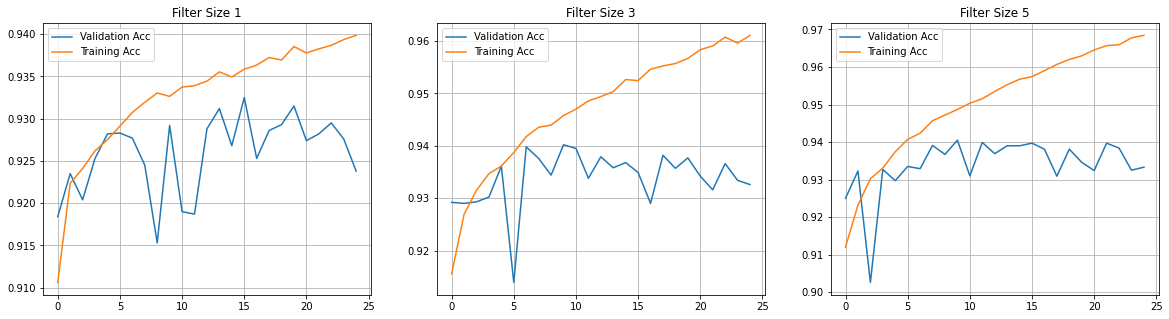

In [10]:
plt.figure(figsize=(20,5))
legend = ['Validation Acc','Training Acc']
titles = ['Filter Size 1','Filter Size 3','Filter Size 5']
for i in range(3):
  plt.subplot(1,3,i+1)
  plot_figures([model_history1[i].history['val_accuracy'],model_history1[i].history['accuracy']],legend,titles[i])
plt.show()

* As the kernal size don't impact upon the performance upon the CNN directly, but increasing kernal size start lossing some important information kept within smaller area. Whereas smaller kernal can detect those information easily. 
* On the other hand, kernal size impact upon the computational complexity directly. As the kernal size increses the computational complexity decrease. 

# Model 2

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               6423040   
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

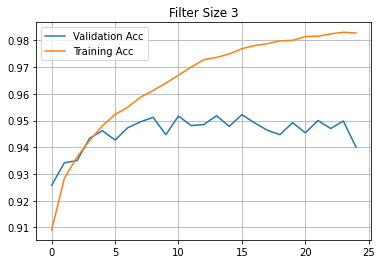

In [13]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(dropout))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(2, activation='softmax'))
model2.summary()
model2.compile('RMSProp',loss='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0,callbacks = callback)
print('Model with kernel size 3 is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][-1],history.history['accuracy'][-1]))

legend = ['Validation Acc','Training Acc']
titles = 'Filter Size 3'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()

* In most of the architechture more than one CNN layers are used to extract the features. The first convolutional layer is bbasically extracts the basic or low level features from the images and creates the raw data which can be passed to next CNN layer for further analysis. 

* The second convolutional layer, instead of the raw image, accepts the features extracted by the first as its input. This allows it to combine these basic shapes into more complex features.

* Thus, 2 CNN consecutive model performs better than the model described in 1. 

# Model 3

In [17]:
def buildModel3(trainable=True):
  model = Sequential()
  model.add(Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(32,32,3),trainable=trainable))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(8192,activation='relu'))
  model.add(Reshape((16,16,32)))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(3,(3,3),activation='sigmoid',padding='same'))
  model.compile('RMSProp',loss='mse',metrics=['mse'])
  return model

In [18]:
model3 = buildModel3()
model3.summary()
history = model3.fit(trainX, trainX, epochs=epochs, batch_size=batchSize, validation_data=(testX, testX), verbose=0,callbacks = callback)
print("Model is trained with training acc: {}".format(history.history['mse'][-1]))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_17 (Dense)             (None, 8192)              4202496   
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 32)       

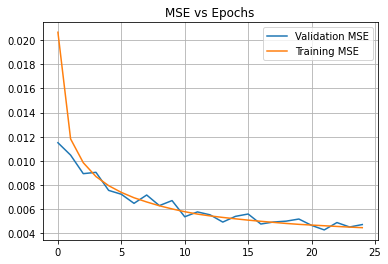

In [19]:
legend = ['Validation MSE','Training MSE']
titles = ['MSE vs Epochs']
plot_figures([history.history['val_mse'],history.history['mse']],legend,titles[0])
plt.show()

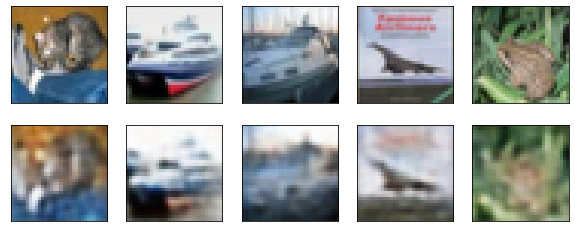

In [20]:
reconstructedImages = model3.predict(testX)
plt.figure(figsize=(10, 4))
n = 5
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(testX[i].reshape(32, 32,3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(reconstructedImages[i].reshape(32, 32,3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

* Here one important observation is that the Less MSE or High PNR doesn't mean the clarity of the image. Even if with the low MSE, reconstructed image doesn't look good. Meaning that, the perceptual loss of reconstructed image is much more higher. 

# Model 4

Weigths are extracted
Weigths are loaded
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               3686912   
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 1026      
Total params: 3,688,834
Trainable params: 3,687,938
Non-trainable params: 896
_________________________________________________________________
Model is trained. Testing Acc: 0.9265999794006348  Training Acc: 0.

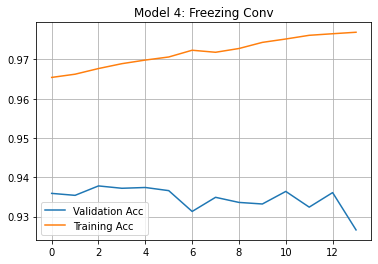

In [14]:
weights = model1_3.get_weights()
print("Weigths are extracted")
model4 = buildModel1(3,trainable=False)
model4.set_weights(weights)
print("Weigths are loaded")
model4.summary()
history = model4.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0,callbacks = callback)
print('Model is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][-1],history.history['accuracy'][-1]))

legend = ['Validation Acc','Training Acc']
titles = 'Model 4: Freezing Conv'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()

* Since the training of the model is not improving, early stopping helps in reduction of computational complexity by stopping the training process early.

# Model 5

Model 3 weights are extracted.
Weigths are loaded
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_23 (Dense)             (None, 8192)              4202496   
_________________________________________________________________
reshape_2 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
up_

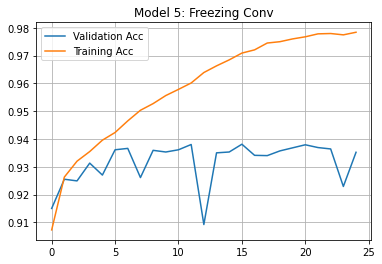

In [22]:
weights = model3.get_weights()
print("Model 3 weights are extracted.")
model5 = Sequential()
model5.add(Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(32,32,3),trainable=False))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(512,activation='relu'))
model5.add(Dense(8192,activation='relu'))
model5.add(Reshape((16,16,32)))
model5.add(UpSampling2D((2, 2)))
model5.add(Conv2D(3,(3,3),activation='sigmoid',padding='same',trainable=False))
model5.set_weights(weights)
print("Weigths are loaded")
model5.add(Flatten())
model5.add(Dense(512,activation='relu'))
model5.add(Dense(2,activation='sigmoid'))
model5.summary()
model5.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)
history = model5.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0,callbacks = callback)
print('Model is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][-1],history.history['accuracy'][-1]))

legend = ['Validation Acc','Training Acc']
titles = 'Model 5: Freezing Conv'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()

# Model 6

In [15]:
testY = to_categorical(testY)
trainY = to_categorical(trainY) 

Model 4 weights are extracted.
Model 4 weights are loaded successfully
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               3686912   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 3,692,938
Trainable params: 5,130
Non-trainable params: 3,687,808
_________________________________________________________________
Model is trained. Testing Acc: 0.35

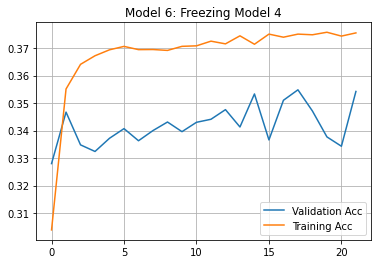

In [16]:
weights = model4.get_weights()
print("Model 4 weights are extracted.")
model6 = Sequential()
model6.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),trainable=False))
model6.add(MaxPooling2D((2, 2))) 
model6.add(Flatten())
model6.add(Dense(512,activation='relu',trainable=False))
model6.set_weights(weights[0:len(weights)-2])
print("Model 4 weights are loaded successfully")
model6.add(Dense(10, activation='softmax'))
model6.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model6.summary()
history = model6.fit(trainX, trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, testY), verbose=0,callbacks = callback)
print('Model is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][-1],history.history['accuracy'][-1]))

legend = ['Validation Acc','Training Acc']
titles = 'Model 6: Freezing Model 4'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()

* Early stopping at epoch 21

* Since the feature layers' weights are freezed, model is just capable of finding the features which matches with one of the class. 
* Model is unaware of all other 9 class features. Thus, when we trained the model on 2 class classification, it can detect 1 class completely, but all other class can be detected in a group. For example, model may not detect the DOG and CAT as the different class but it may detect the table and cat as different class.
* Thus we get less training and testing accuracy.   

# Best Configration

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)      

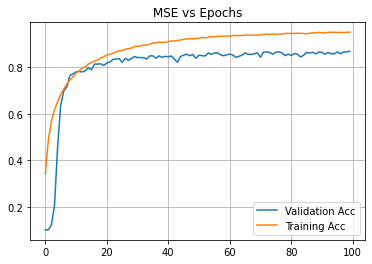

In [ ]:
############################
######  PARAMETERS #########
############################
lemda = 1e-4 
epochs = 100
batchSize = 512
############################

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, testY), verbose=0)
print('Model is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][epochs-1],history.history['accuracy'][epochs-1]))

legend = ['Validation Acc','Training Acc']
titles = 'MSE vs Epochs'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()